In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
features = pd.read_csv("data/walmart-recruiting-store-sales-forecasting/features.csv.zip")
sample_submission = pd.read_csv("data/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip")
stores = pd.read_csv("data/walmart-recruiting-store-sales-forecasting/stores.csv")
test = pd.read_csv("data/walmart-recruiting-store-sales-forecasting/test.csv.zip")
train = pd.read_csv("data/walmart-recruiting-store-sales-forecasting/train.csv.zip")

In [16]:
#features_mark = features
#features_mark["Date"] = pd.to_datetime(features_mark["Date"]).dt.strftime("%Y%m%d")
#features_mark["Date"] = pd.to_numeric(features_mark["Date"],errors='ignore')
#features_mark = features_mark.loc[features_mark["Date"] > 20111201]

In [17]:
#features_mark.shape

In [18]:
#print("MarkDown1: ", features_mark['MarkDown1'].isna().sum()/len(features_mark['MarkDown1']))
#print("MarkDown2: ", features_mark['MarkDown2'].isna().sum()/len(features_mark['MarkDown2']))
#print("MarkDown3: ", features_mark['MarkDown3'].isna().sum()/len(features_mark['MarkDown3']))
#print("MarkDown4: ", features_mark['MarkDown4'].isna().sum()/len(features_mark['MarkDown4']))
#print("MarkDown5: ", features_mark['MarkDown5'].isna().sum()/len(features_mark['MarkDown5']))


In [19]:
#features.hist(['MarkDown5'])

In [10]:
#train_1 = train.loc[train['Store'].isin([1,2,3,4,5])]
#features_1 = features.loc[features['Store'].isin([1,2,3,4,5])]

In [32]:
merged = train.merge(features, on=['Date', 'Store', 'IsHoliday'])
merged['week'] = pd.to_datetime(merged.Date).dt.week
merged['year'] = pd.to_datetime(merged.Date).dt.year
merged["IsHoliday"] = merged["IsHoliday"].astype(int)
#merged["IsHoliday_y"] = merged["IsHoliday_y"].astype(int)
merged["Date"] = pd.to_datetime(merged["Date"]).dt.strftime("%Y%m%d")
#merged['MarkDown1'] = merged['MarkDown1'].fillna(0)
#merged['MarkDown2'] = merged['MarkDown2'].fillna(0)
#merged['MarkDown3'] = merged['MarkDown3'].fillna(0)
#merged['MarkDown4'] = merged['MarkDown4'].fillna(0)
#merged['MarkDown5'] = merged['MarkDown5'].fillna(0)
merged = merged.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']) #Drop all MarkDown cols, because of many NaN values

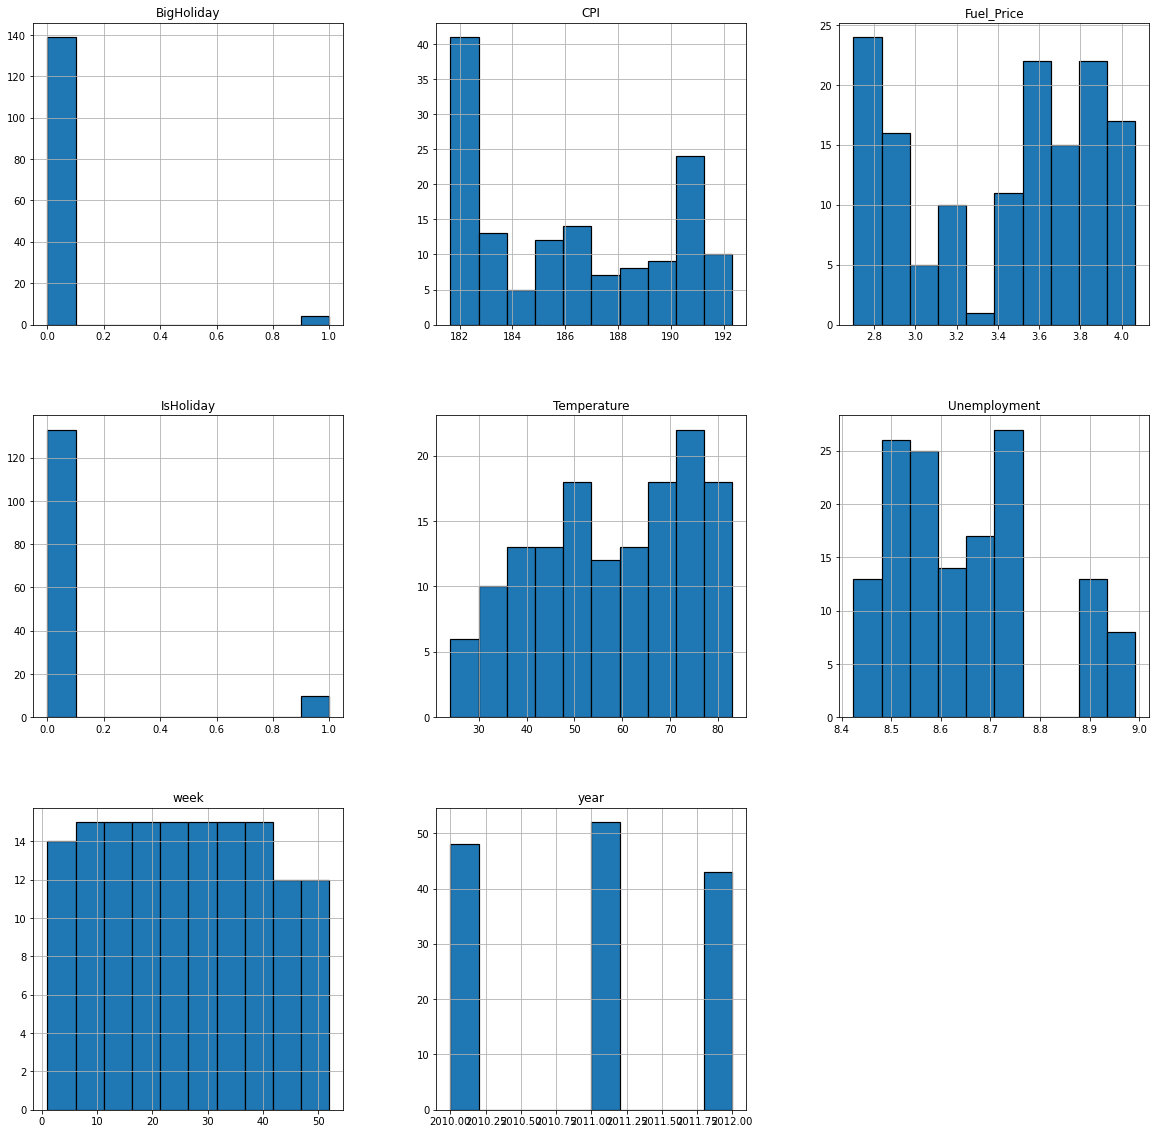

In [56]:
# Creating a df with data related to each day
dateData = merged
dateData = dateData.drop_duplicates(subset=['Date'], keep='last')
dateData = dateData.drop(columns=['Store', 'Dept', 'Weekly_Sales'])
dateData
dateData.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [146]:
allData = features
allData['week'] = pd.to_datetime(allData.Date).dt.week
allData['year'] = pd.to_datetime(allData.Date).dt.year
allData["IsHoliday"] = allData["IsHoliday"].astype(int)
allData = allData.drop_duplicates(subset=['Date'], keep='last')

<function matplotlib.pyplot.show(*args, **kw)>

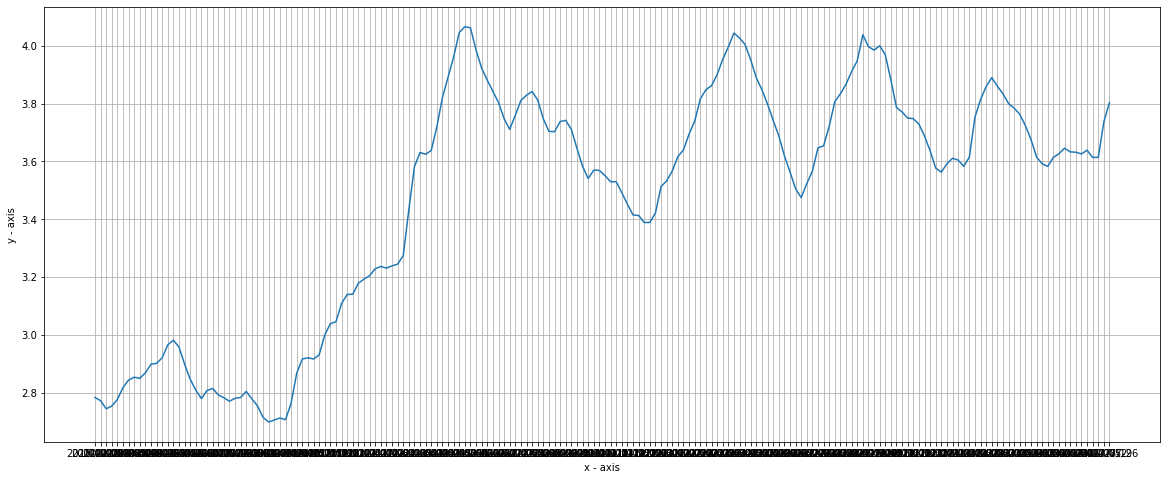

In [167]:
plt.figure(figsize=(20,8))
plt.grid()
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.plot(allData['Date'],allData['Fuel_Price'], label = 'line 1')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

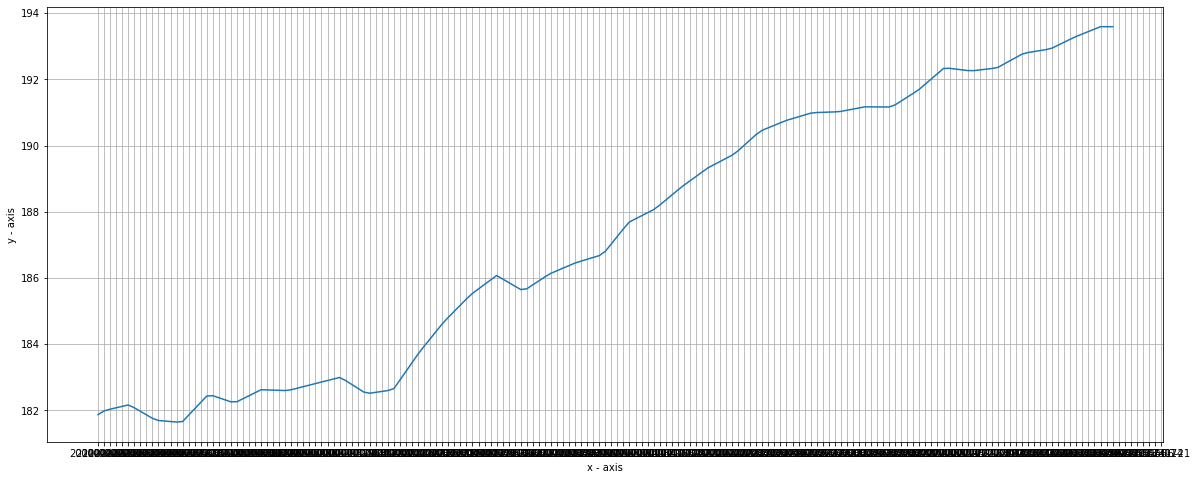

In [148]:
plt.figure(figsize=(20,8))
plt.grid()
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.plot(allData['Date'],allData['CPI'], label = 'line 1')
plt.show

In [165]:
CPI2010 = allData[allData['week']==1].iloc[0][9]
CPI2011 = allData[allData['week']==1].iloc[1][9]
CPI2012 = allData[allData['week']==1].iloc[2][9]

annualGrowth1 = CPI2011/CPI2010
annualGrowth2 = CPI2012/CPI2011
(annualGrowth2 + annualGrowth1)/2-1

0.027219580588418335

In [33]:
sales_2010 = merged[merged['year']==2010]
sales_2011 = merged[merged['year']==2011]
sales_2012 = merged[merged['year']==2012]
sales_years = [sales_2010, sales_2011, sales_2012]

In [34]:
holidays = sales_2011[sales_2011['IsHoliday']==1]['week']
holidays = list( dict.fromkeys(holidays) ) 
print(holidays)

[6, 36, 47, 52]


In [35]:
total_data = []

for year in sales_years:
    avg_sales = []
    weeks = []

    for week in range(0,52):
        res = np.mean(year[year['week']==week]['Weekly_Sales'])
        avg_sales.append(res)
        weeks.append(week)

    total_data.append([avg_sales, weeks])

In [36]:
avg_sales = []
weeks = []

for week in range(0,52):
    res = np.mean(sales_2010[sales_2010['week']==week]['Weekly_Sales'])
    avg_sales.append(res)
    weeks.append(week)

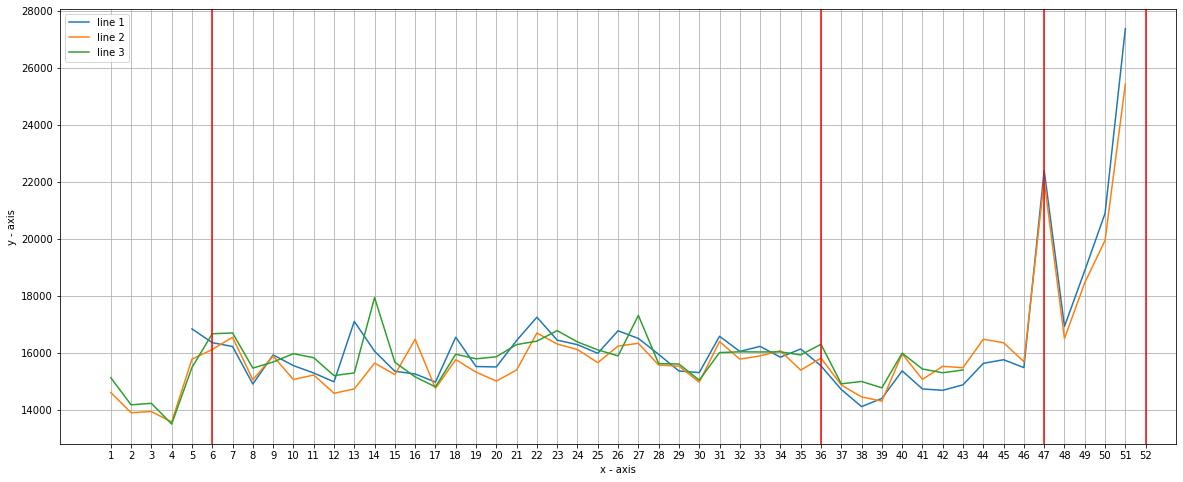

In [37]:
plt.figure(figsize=(20,8))
plt.grid()
plt.xticks(np.arange(1, 53, step=1))

plt.plot(total_data[0][1], total_data[0][0], label = 'line 1') 
plt.plot(total_data[1][1], total_data[1][0], label = 'line 2') 
plt.plot(total_data[2][1], total_data[2][0], label = 'line 3') 
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.legend()
plt.axvline(x=holidays[0], color='r', linestyle='-')
plt.axvline(x=holidays[1], color='r', linestyle='-')
plt.axvline(x=holidays[2], color='r', linestyle='-')
plt.axvline(x=holidays[3], color='r', linestyle='-')
plt.show()

In [38]:
merged['BigHoliday'] = 0
merged.loc[merged['week'] == 47, 'BigHoliday'] = 1
merged.loc[merged['week'] == 52, 'BigHoliday'] = 1

In [67]:
sales_years[0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,week,year,day
0,1,1,20100205,24924.50,0,42.31,2.572,211.096358,8.106,5,2010,5
1,1,2,20100205,50605.27,0,42.31,2.572,211.096358,8.106,5,2010,5
2,1,3,20100205,13740.12,0,42.31,2.572,211.096358,8.106,5,2010,5
3,1,4,20100205,39954.04,0,42.31,2.572,211.096358,8.106,5,2010,5
4,1,5,20100205,32229.38,0,42.31,2.572,211.096358,8.106,5,2010,5
...,...,...,...,...,...,...,...,...,...,...,...,...
415150,45,93,20101231,2072.46,1,29.67,3.179,182.571448,8.724,52,2010,31
415151,45,94,20101231,3966.80,1,29.67,3.179,182.571448,8.724,52,2010,31
415152,45,95,20101231,43149.88,1,29.67,3.179,182.571448,8.724,52,2010,31
415153,45,97,20101231,5881.22,1,29.67,3.179,182.571448,8.724,52,2010,31


In [82]:
## It seems reasonable that sales depend partly on day of the month. 
merged['day'] = pd.to_datetime(merged.Date).dt.day

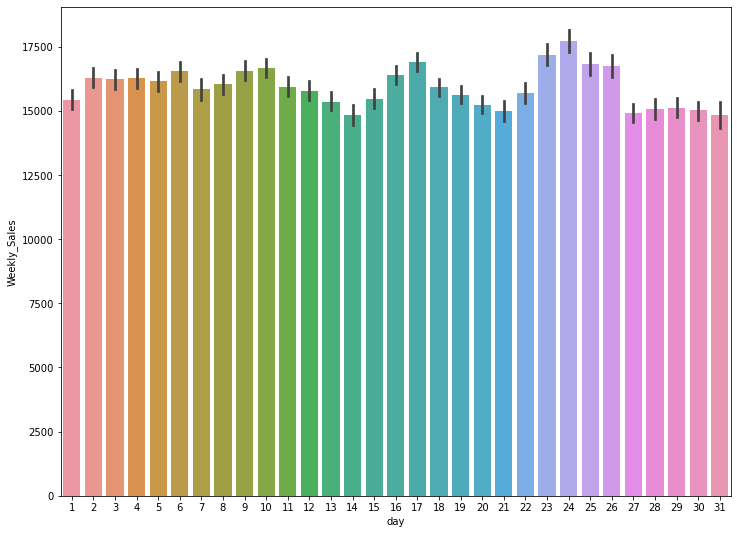

In [74]:
plt.figure(figsize=(12,9))
sns.barplot(x='day', y='Weekly_Sales', data=merged)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,week,year,BigHoliday,day
0,1,1,20100205,24924.50,0,42.31,2.572,211.096358,8.106,5,2010,0,5
1,1,2,20100205,50605.27,0,42.31,2.572,211.096358,8.106,5,2010,0,5
2,1,3,20100205,13740.12,0,42.31,2.572,211.096358,8.106,5,2010,0,5
3,1,4,20100205,39954.04,0,42.31,2.572,211.096358,8.106,5,2010,0,5
4,1,5,20100205,32229.38,0,42.31,2.572,211.096358,8.106,5,2010,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,20121026,2487.80,0,58.85,3.882,192.308899,8.667,43,2012,0,26
421566,45,94,20121026,5203.31,0,58.85,3.882,192.308899,8.667,43,2012,0,26
421567,45,95,20121026,56017.47,0,58.85,3.882,192.308899,8.667,43,2012,0,26
421568,45,97,20121026,6817.48,0,58.85,3.882,192.308899,8.667,43,2012,0,26


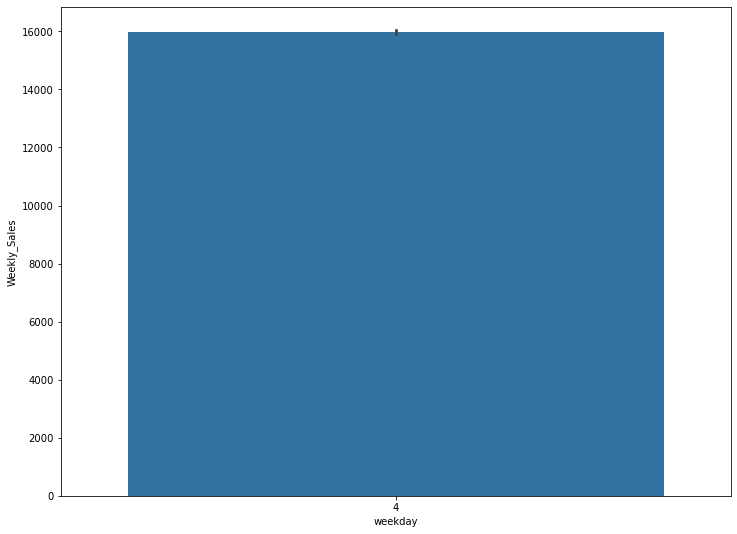

In [86]:
# Checking the same thing with weekdays
merged['weekday'] = pd.to_datetime(merged.Date).dt.dayofweek
plt.figure(figsize=(12,9))
sns.barplot(x='weekday', y='Weekly_Sales', data=merged)

# It seems like all days are Fridays
merged.drop(columns = 'weekday')

In [76]:
merged_target = merged['Weekly_Sales']
merged_data = merged.drop(columns=['Weekly_Sales'])

In [77]:
merged_data.shape

(421570, 12)

In [97]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(merged_data, merged_target, test_size=0.33, random_state=42)

In [98]:
#from sklearn import preprocessing
#scaler = preprocessing.StandardScaler().fit(X_train)
#scaler2 = preprocessing.StandardScaler().fit(X_test)

#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler2.transform(X_test)

In [99]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test_scaled)

In [80]:
def wmae(Y_test, y_pred, X_test):
    weight_sum = 0
    error_sum = 0

    for i in range(len(Y_test)):
        weight = 1+4*(X_test.iloc[i]['IsHoliday'])
        weight_sum += weight
        error_sum += weight*abs(Y_test.iloc[i]-y_pred[i])

    return (error_sum/weight_sum)


In [100]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('Weighted Mean Absolute Error:', wmae(Y_test,y_pred,X_test))

Mean Absolute Error: 44015.53397793256
Weighted Mean Absolute Error: 46699.53823177458


# Doing the same on the test set

In [128]:
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [129]:
merged2 = test.merge(features, on=['Date', 'Store', 'IsHoliday'])
merged2['week'] = pd.to_datetime(merged2.Date).dt.week
merged2['year'] = pd.to_datetime(merged2.Date).dt.year
merged2['day'] = pd.to_datetime(merged2.Date).dt.day
merged2['weekday'] = pd.to_datetime(merged2.Date).dt.dayofweek

merged2["IsHoliday"] = merged2["IsHoliday"].astype(int)

#merged["IsHoliday_y"] = merged["IsHoliday_y"].astype(int)
merged2["Date"] = pd.to_datetime(merged2["Date"]).dt.strftime("%Y%m%d")
#merged['MarkDown1'] = merged['MarkDown1'].fillna(0)
#merged['MarkDown2'] = merged['MarkDown2'].fillna(0)
#merged['MarkDown3'] = merged['MarkDown3'].fillna(0)
#merged['MarkDown4'] = merged['MarkDown4'].fillna(0)
#merged['MarkDown5'] = merged['MarkDown5'].fillna(0)
merged2 = merged2.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']) #Drop all MarkDown cols, because of many NaN values

In [131]:
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [130]:
merged2

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,week,year,day,weekday
0,1,1,20121102,0,55.32,3.386,223.462779,6.573,44,2012,2,4
1,1,2,20121102,0,55.32,3.386,223.462779,6.573,44,2012,2,4
2,1,3,20121102,0,55.32,3.386,223.462779,6.573,44,2012,2,4
3,1,4,20121102,0,55.32,3.386,223.462779,6.573,44,2012,2,4
4,1,5,20121102,0,55.32,3.386,223.462779,6.573,44,2012,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,20130726,0,76.06,3.804,NaN,NaN,30,2013,26,4
115060,45,94,20130726,0,76.06,3.804,NaN,NaN,30,2013,26,4
115061,45,95,20130726,0,76.06,3.804,NaN,NaN,30,2013,26,4
115062,45,97,20130726,0,76.06,3.804,NaN,NaN,30,2013,26,4


In [105]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train_scaled, Y_train)
y_pred = regressor.predict(X_test_scaled)

In [119]:
merged2

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature_x,Fuel_Price_x,CPI_x,Unemployment_x,week,year,BigHoliday,day,weekday,Temperature_y,Fuel_Price_y,CPI_y,Unemployment_y


In [ ]:
outPut = merged2['Store', 'Department']

In [102]:
merged2['Id'] = merged2['Store'].astype(str) + '_' + merged2['Dept'].astype(str) + '_' + merged2['Date'].astype(str)

In [103]:
merged2

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature_x,Fuel_Price_x,CPI_x,Unemployment_x,week,year,BigHoliday,day,weekday,Temperature_y,Fuel_Price_y,CPI_y,Unemployment_y,Id


In [116]:
strings = '20200101'
strings[4:6]

'01'